# Matching

author: steeve.laquitaine@epfl.ch  
date: 14.09.2023


### Setup 
activate `firing rate` environment

In [1]:
%load_ext autoreload
%autoreload 2
import os 
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns 

proj_path = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/bernstein_2023/"
os.chdir(proj_path)

from src.nodes.postpro.cell_matching import get_SpikeInterface_matching_object
from src.nodes.utils import get_config
from src.nodes.postpro.npx_cell_types import get_interneurons, get_pyramidal

# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_09_12"

# GET RUN CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()

# set Kilosort sorted spikes and cells path
KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]

# set ground truth spikes and cells path
GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

# match file save path
MATCH_FILE = data_conf["sorting"]["sorters"]["kilosort3"]["match_with_cell_type"]

2023-09-14 18:18:39,552 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-14 18:18:39,580 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [2]:
# are the sorted units overmerged (have non zero agreement scores with other true units)
# get matching object
MatchingObject = get_SpikeInterface_matching_object(GT_SORTING_PATH, KS3_SORTING_PATH)

/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


In [3]:
# get agreement scores for all
matching = MatchingObject.agreement_scores.T

# sort each row such that the row with the highest score be first, column order stays untouched
argmax = matching.T.idxmax().to_frame()
max = matching.T.max()
descending_ix = np.argsort(max)[::-1]
matching_sorted = matching.iloc[descending_ix]

# repeat for columns, row order stays untouched
argmax = matching_sorted.idxmax().to_frame()
max = matching_sorted.max()
descending_ix = np.argsort(max)[::-1]
matching_sorted = matching_sorted.iloc[:, descending_ix]
matching_sorted

,3112298,2173940,1527208,891776,3668052,103528,1816718,3621372,524306,684054,...,4108799,1686429,1688572,3100538,3088705,1701528,1702203,1707451,1708051,3872021
85,0.642857,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.000000,0.541841,0.004598,0.002764,0.002128,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.000000,0.540260,0.000000,0.001533,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.000000,0.096567,0.435374,0.000817,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.000000,0.105263,0.017391,0.419103,0.000000,0.0,0.000826,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.000000,0.000484,0.000567,0.002163,0.001112,0.0,0.000553,0.0,0.0,0.001611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.000000,0.000000,0.000000,0.000723,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


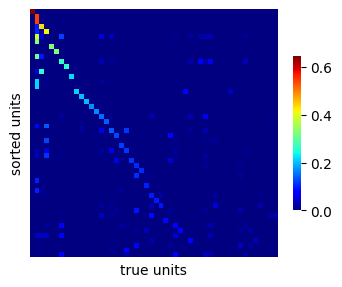

In [4]:
# plot (50 first true and ground truth units)
mx_to_plot = matching_sorted.iloc[:50,:50].values
fig, axis = plt.subplots(figsize=(4,4))
ax = sns.heatmap(mx_to_plot, cmap="jet", cbar_kws={"shrink": 0.5}, yticklabels=False, xticklabels=False);

# legend
plt.xlabel("true units");
plt.ylabel("sorted units");
ax.set_aspect("equal")
# plt.savefig("figures/matching_heatmap.pdf")

## Match units

* For each true unit, its sorted unit is the unit with the highest agreement score with the true unit.
* We drop the redundant sorted units, associated with many ground truth with different cell types as a cell type can not be assigned to them.
* We keep all other sorted units, including those matched with scores below chance (10%), because in-vivo, w/o ground truth information, they could be kept.

In [5]:
# get best matching pair
matched = matching_sorted.idxmax().to_frame()
matched = matched.sort_index()

In [6]:
# get ground truth cell types
pyr_neurons = get_pyramidal(data_conf)
parv_neurons = get_interneurons(data_conf,'LBC|NBC')
sst_neurons = get_interneurons(data_conf,'MC')
vip_neurons = get_interneurons(data_conf,'SBC')

2023-09-14 18:19:47,244 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-09-14 18:19:47,269 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.0


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


2023-09-14 18:20:13,716 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-09-14 18:20:13,726 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.0


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


2023-09-14 18:20:39,819 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-09-14 18:20:39,829 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.0


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


2023-09-14 18:21:05,468 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-09-14 18:21:05,477 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.0


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


In [7]:
# unit-test (populations should be distinct)
assert len(set(pyr_neurons) - set(parv_neurons)) == len(set(pyr_neurons)), "the two populations should be separate"
assert len(set(pyr_neurons) - set(sst_neurons)) == len(set(pyr_neurons)), "the two populations should be separate"
assert len(set(pyr_neurons) - set(vip_neurons)) == len(set(pyr_neurons)), "the two populations should be separate"
assert len(set(parv_neurons) - set(sst_neurons)) == len(set(parv_neurons)), "the two populations should be separate"
assert len(set(parv_neurons) - set(vip_neurons)) == len(set(parv_neurons)), "the two populations should be separate"
assert len(set(sst_neurons) - set(vip_neurons)) == len(set(sst_neurons)), "the two populations should be separate"

In [8]:
# map cell types to ground truths and matched sorted units
matched.loc[pyr_neurons, "cell_type"] = "pyr"
matched.loc[parv_neurons, "cell_type"] = "parv"
matched.loc[sst_neurons, "cell_type"] = "sst"
matched.loc[vip_neurons, "cell_type"] = "vip"

# tag others as interneurons
matched["cell_type"][matched["cell_type"].isna()] ="intern"
len(matched)

/tmp/ipykernel_185917/3483055713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched["cell_type"][matched["cell_type"].isna()] ="intern"


1226

In [9]:
# drop sorted units that match many ground truths ("redundant") with different cell types
matched_sorted_units = np.unique(matched[0].values)

matched["to_drop"] = 0

for ix in range(len(matched_sorted_units)):

    # case sorted unit matches many ground truths
    if sum(matched[0] == matched_sorted_units[ix])>1:
        
        # find redundant sorted unit
        loc = np.where(matched[0] == matched_sorted_units[ix])[0]
        
        # flag to drop if they have different cell types
        if len(np.unique(matched["cell_type"].iloc[loc])) > 1:
            matched["to_drop"].iloc[loc] = 1
        else:
            matched["to_drop"].iloc[loc] = 0

# drop redundant with different cell types
matched = matched[matched["to_drop"]==0]
matched = matched.drop(columns=["to_drop"])
matched

/tmp/ipykernel_185917/3529470941.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched["to_drop"].iloc[loc] = 0
/tmp/ipykernel_185917/3529470941.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched["to_drop"].iloc[loc] = 1


,0,cell_type
16652,54,pyr
30168,77,pyr
103528,83,pyr
110221,114,pyr
192371,123,pyr
...,...,...
4181753,34,pyr
4187681,24,pyr
4199461,34,pyr
4201675,42,pyr


In [10]:
# unit-test (all redundant units' cell types are unique)
for ix in range(len(matched_sorted_units)):
    assert len(np.unique(matched["cell_type"][matched[0]==matched_sorted_units[ix]]))<2, "error"

In [11]:
# get accuracy scores
score = []
for ix in range(matched.shape[0]):
    score.append(matching_sorted.loc[matched[0].values[ix], matched.index[ix]])
score = np.array(score)

In [12]:
# add scores
matched["accuracy"] = score
matched.sort_values(by="accuracy", ascending=False)

,0,cell_type,accuracy
1527208,20,pyr,0.435374
3668052,72,pyr,0.322314
103528,83,pyr,0.320000
1816718,42,pyr,0.262500
3621372,74,pyr,0.259259
...,...,...,...
3911215,122,pyr,0.002092
417595,58,pyr,0.001946
3828956,64,pyr,0.001859
2914323,58,pyr,0.001855


In [13]:
# save match file
parent_path = os.path.dirname(MATCH_FILE)
if not os.path.isdir(parent_path):
    os.makedirs(parent_path)
matched.insert(0, "ground truth", matched.index)
matched = matched.rename(columns={0:"sorted"})
matched.to_csv(MATCH_FILE, index=False)
# matched = matched.drop(columns=["ground truth"])